In [1]:
import gym
from matplotlib import animation
from matplotlib import pyplot as plt

# animationをjupyter上で見ることを可能にするおまじない

暫定的に本と同じ以下を使ってみる：

In [2]:
%matplotlib inline

または以下のいずれかを使ってもいいかもしれないが動作確認とれてない

nbaggだとfigが動く（？）

In [ ]:
%matplotlib nbagg

notebookだとanimが動く（？）

In [ ]:
%matplotlib notebook

# official tutorialの方法(skip推奨？)

https://gym.openai.com/docs/

In [ ]:
import gym
env = gym.make('CartPole-v0')
env.reset()
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) # take a random action

- 上記は停止条件がないためにどこかに飛んでいってしまうがローカルでは動くことは動いている
- ただし、これでは別窓なのでremoteからは見えない

# remoteからも観察可能なbest practiceを探ろう

## imshowで表示可能なrgb_arrayのリストとして出力

In [6]:
env = gym.make('CartPole-v0')
env.reset()

array([-0.03385659, -0.00365691, -0.02673923,  0.03869002])

### remote jupyterでうまく動かすために
https://stackoverflow.com/questions/40195740/how-to-run-openai-gym-render-over-a-server

```bash
xvfb-run -s "-screen 0 1400x900x24" jupyter notebook
```
でjupyter notebookを立ち上げるべきとあるがうまくいかない

In [7]:
frames = []
for i in range(5000):
    #frames.append(env.render(mode = 'rgb_array'))
    #env.step(env.action_space.sample()) # take a random action
    #observation, reward, done, info = env.step(action)
    
    frames.append(env.render(mode = 'rgb_array'))
    action = env.action_space.sample()
    print(action)
    observation, reward, done, info = env.step(action)
    if done:
        break
    if done:
        break
    if i % 50 == 0:
        print(i)
#env.render()

0
0
1
1
0
1
1
1
1
1
1
1
0
0


In [ ]:
env.render?

## object oriented versionの試み

(0.0, 1.0, 0.0, 1.0)

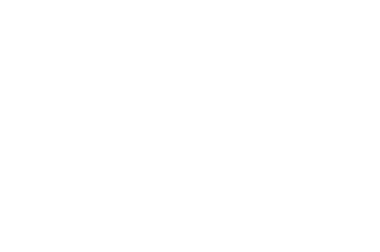

In [8]:
fig = plt.figure()

ax = fig.add_subplot("111")

ax.axis('off')

In [9]:
patch = ax.imshow(frames[0])

imshowにdataをセットするだけでスクリーン上に反映される:


https://qiita.com/AnchorBlues/items/3acd37331b12e844d259

In [10]:
def animate(i):
    if i > 0:
        pass#fig.clear()
    patch.set_data(frames[i])

In [ ]:
len(frames)

In [11]:
anim = animation.FuncAnimation(fig, animate, frames = len(frames), interval=150)

## animation表示方法（成功例）

- どれもうまく行くが一つ表示されていると他の方法は表示されない

### htmlを明示的に経由する以下の方法がよさそう？

https://stackoverflow.com/questions/43445103/inline-animations-in-jupyter

In [12]:
from IPython.display import HTML
HTML(anim.to_jshtml())

### または本の3_2節のように

In [11]:
from JSAnimation.IPython_display import display_animation
from IPython.display import display

In [13]:
display(display_animation(anim, default_mode='loop'))

SyntaxError: invalid syntax (<ipython-input-13-2d1fbe94ad48>, line 1)

### animをそのまま表示しても一応動くがなんか動作が変(?)

In [19]:
anim

NameError: name 'animz' is not defined

animでなくてfigで動き出すこともある(?)のが謎

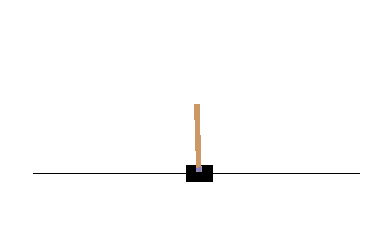

In [20]:
fig

# working example of animation on jupyter

https://qiita.com/mittyantest/items/2ea07b0f8d5976f29da9

をほんのちょっとだけ変更（renderの引数をなくした）

途中で分割するとうまくいかない

In [ ]:
import gym
from matplotlib import animation
from matplotlib import pyplot as plt
%matplotlib nbagg

env = gym.make('CartPole-v0')

# Run a demo of the environment
observation = env.reset()
cum_reward = 0
frames = []
for t in range(5000):
    # Render into buffer. 
    frames.append(env.render(mode = 'rgb_array'))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        break
env.render()

fig = plt.gcf()
patch = plt.imshow(frames[0])
plt.axis('off')

def animate(i):
    patch.set_data(frames[i])

anim = animation.FuncAnimation(fig, animate, frames = len(frames), interval=50)
anim

# sandbox

http://hirotaka-hachiya.hatenablog.com/entry/2018/05/28/185128

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import gym

In [ ]:
%matplotlib nbagg

In [ ]:
from matplotlib import animation

In [ ]:
from IPython.display import display

In [ ]:
env = gym.make('MountainCar-v0')

In [ ]:
env.reset()

In [ ]:
env.render()

In [21]:
%%bash 
git commit -a -m "kinda figured out how to show animation on jupyter"

[master 2f70ae8] kinda figured out how to show animation on jupyter
 1 file changed, 163 insertions(+), 55 deletions(-)


In [ ]:
from pyglet.gl import *

In [ ]:
%%bash
git commit -a -m "still puzzled by the mystery of opengym animation on jupyter"